In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time
import seaborn as sns
import pandas as pd 
from matplotlib.colors import ListedColormap
from sklearn import datasets
wine = datasets.load_wine()

In [0]:
def dist(X, Y):
  return -2* np.dot(X, Y.T) + np.sum(Y ** 2, axis=1)

def mean(X):
  return np.sum(X, axis=0) / np.size(X, axis=0)

def kMeans(scope, K):
  change = True
  axis0 = np.size(scope, 0)
  axis1 = np.size(scope, 1)
  target = np.zeros(axis0)
  centroids = np.zeros((K, axis1))
  for i in range(K):
    centroids[i] = scope[random.randint(0, axis0-1)] 
  while change:       
    change = False
    groups = np.argmin(dist(scope, centroids), axis=1)
    if np.array_equal(groups, target):
      continue
    change = True  
    target = groups
    for k in range(K):
      centroids[k] = mean(scope[target==k])
  return centroids, target

1) irysy

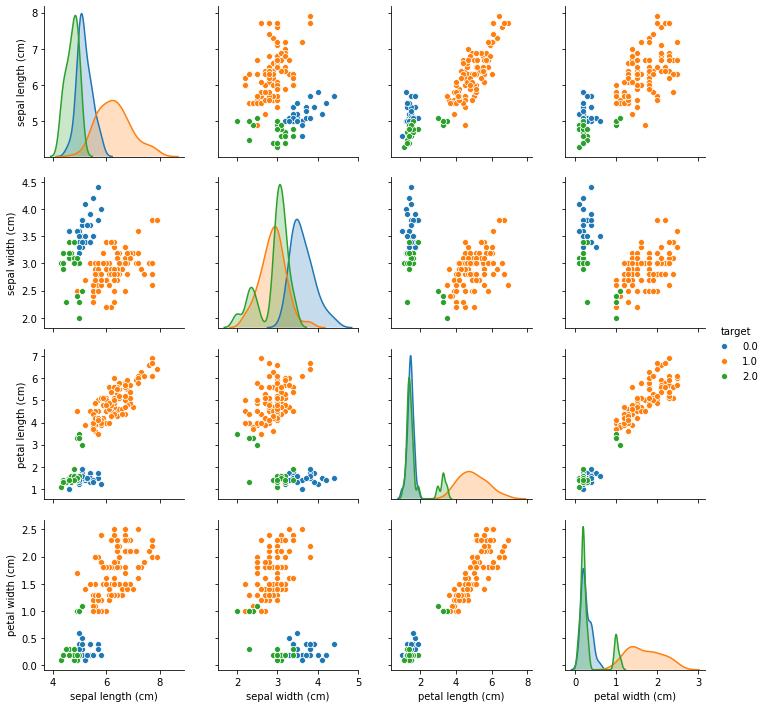

In [47]:
iris = datasets.load_iris()
names = iris.feature_names.copy()
centers, target = kMeans(iris.data, 3)
names.append('target')
df = pd.DataFrame(data=np.c_[iris.data, target], columns=names)

sns.pairplot(df, hue='target', vars=iris.feature_names)

b) wina

czas:  0.0018930435180664062


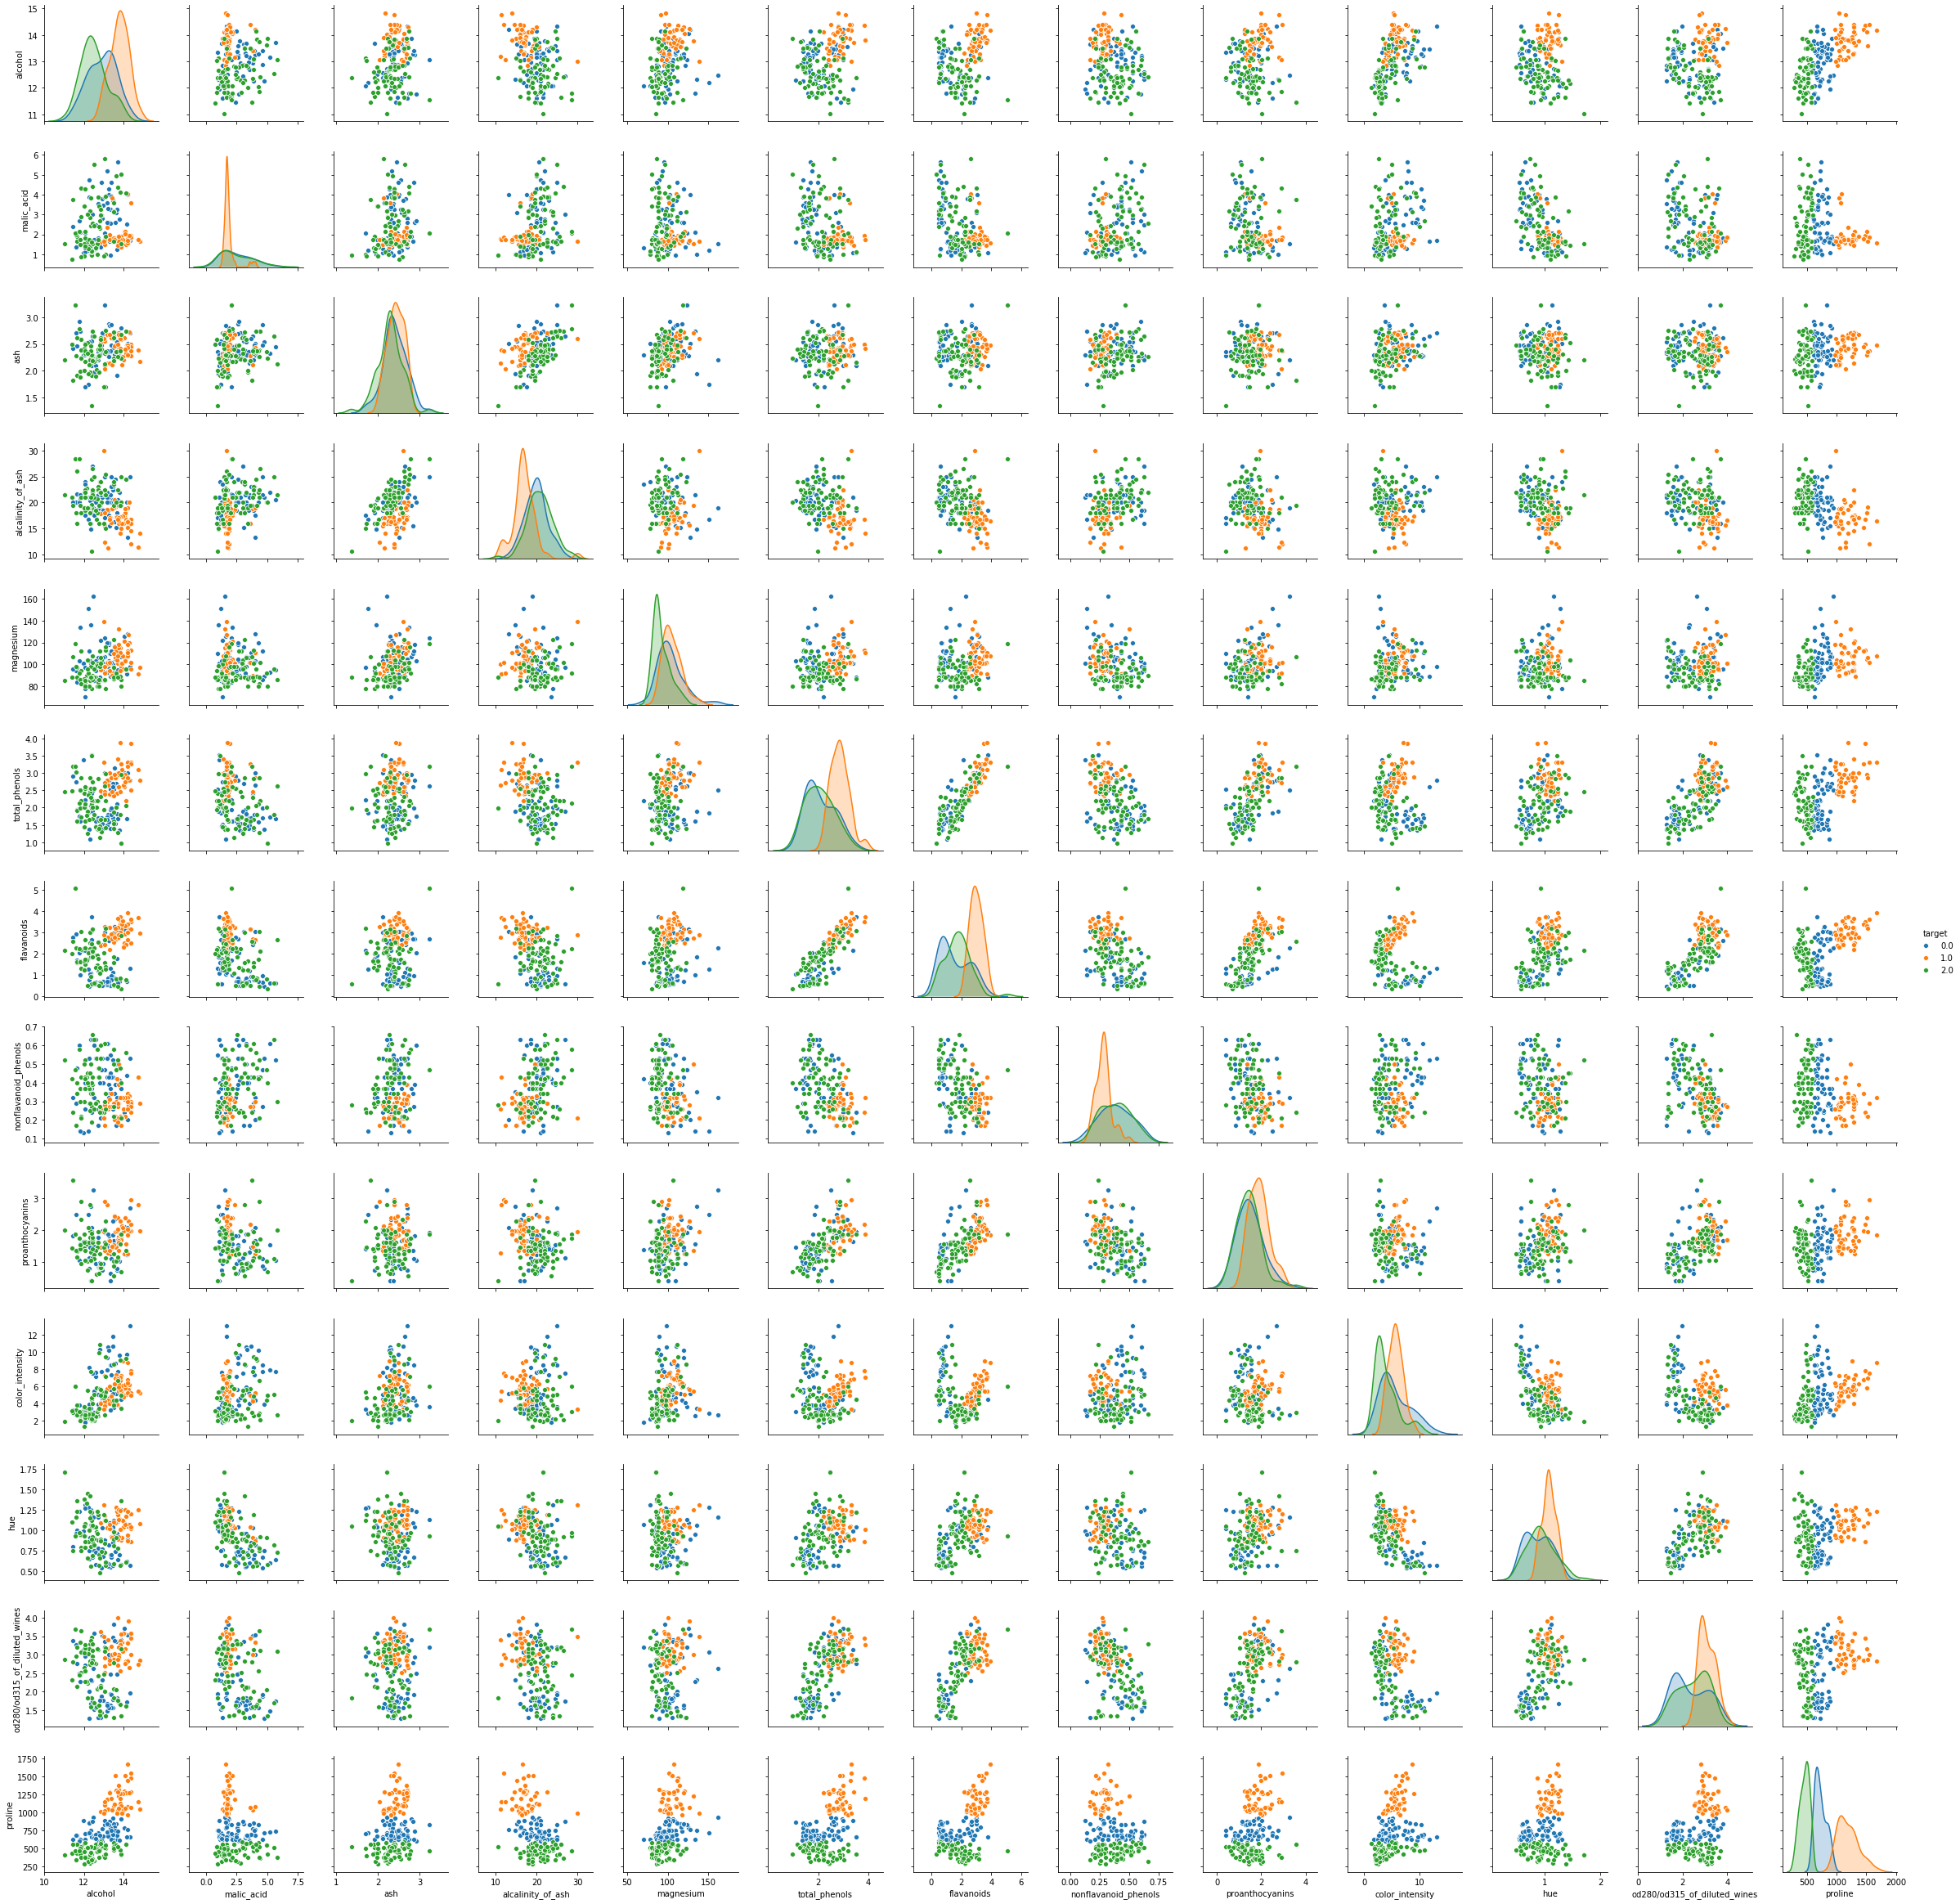

In [48]:
wine = datasets.load_wine()

names = wine.feature_names.copy()
czas = time.time()
centers, target = kMeans(wine.data, 3)
print('czas: ', time.time() - czas)
names.append('target')
df = pd.DataFrame(data=np.c_[wine.data, target], columns=names)

sns.pairplot(df, hue='target', vars=wine.feature_names)

cukrzyca

<class 'list'>


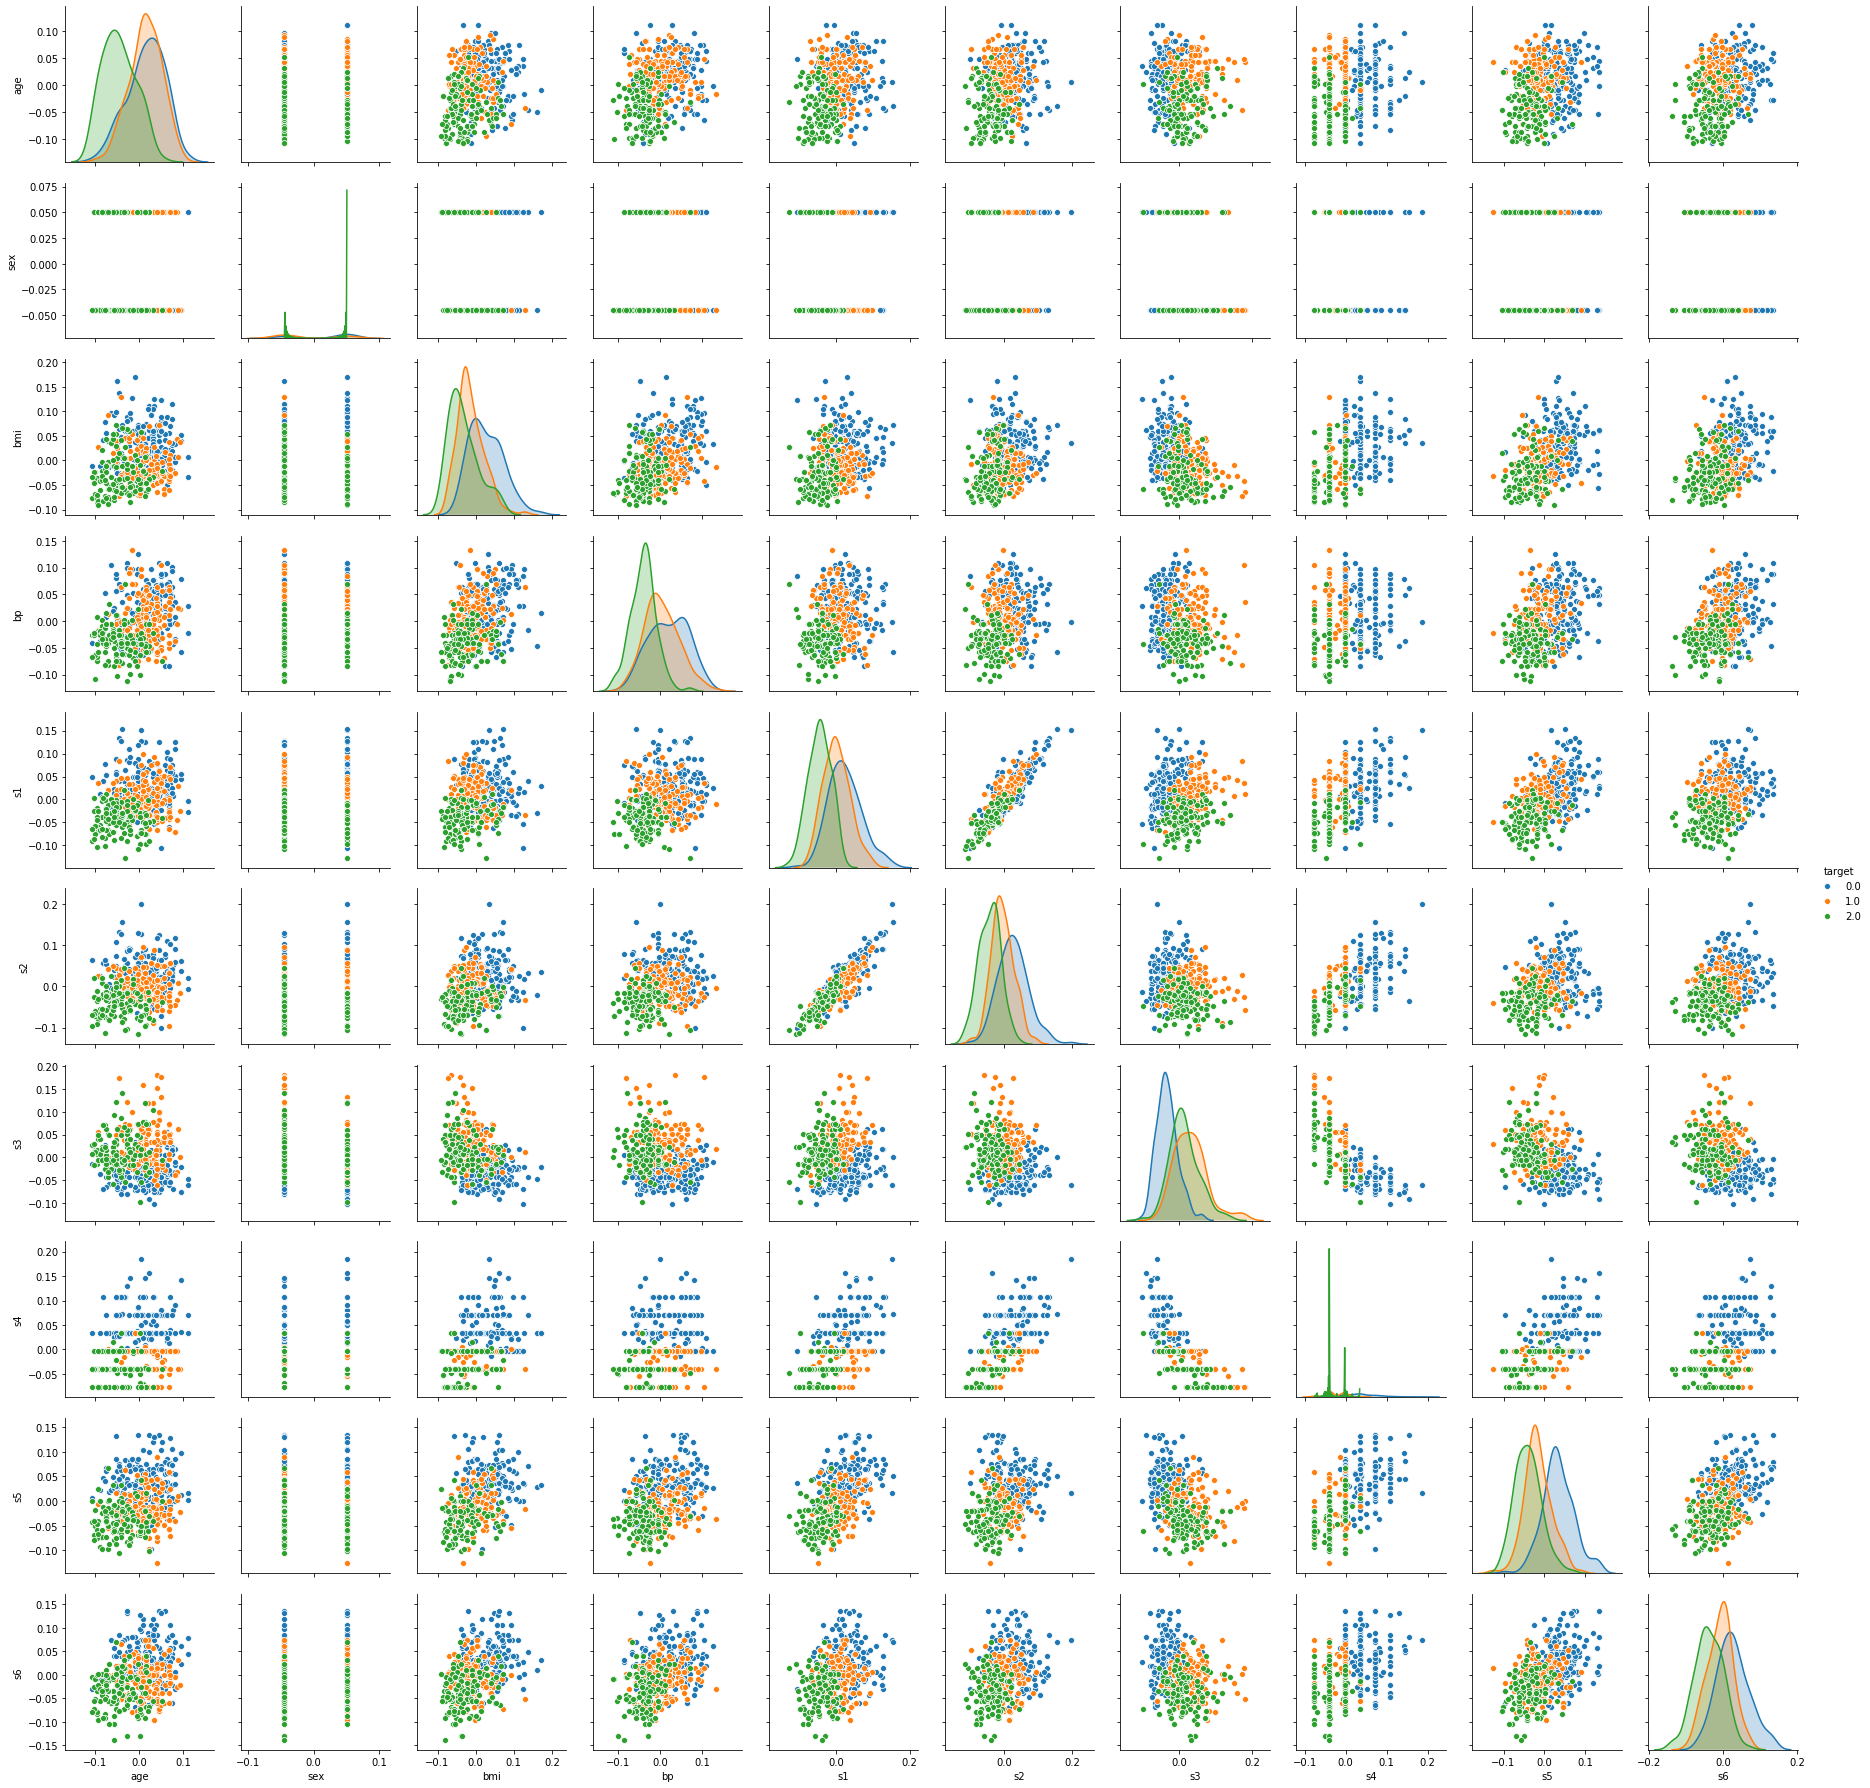

In [58]:
diabetes = datasets.load_diabetes()

names = diabetes.feature_names.copy()
print(type(names))
centers, target = kMeans(diabetes.data, 3)
names.append('target')
df = pd.DataFrame(data=np.c_[diabetes.data, target], columns=names)

sns.pairplot(df, hue='target', vars=diabetes.feature_names)

liczby

czas:  0.003416776657104492


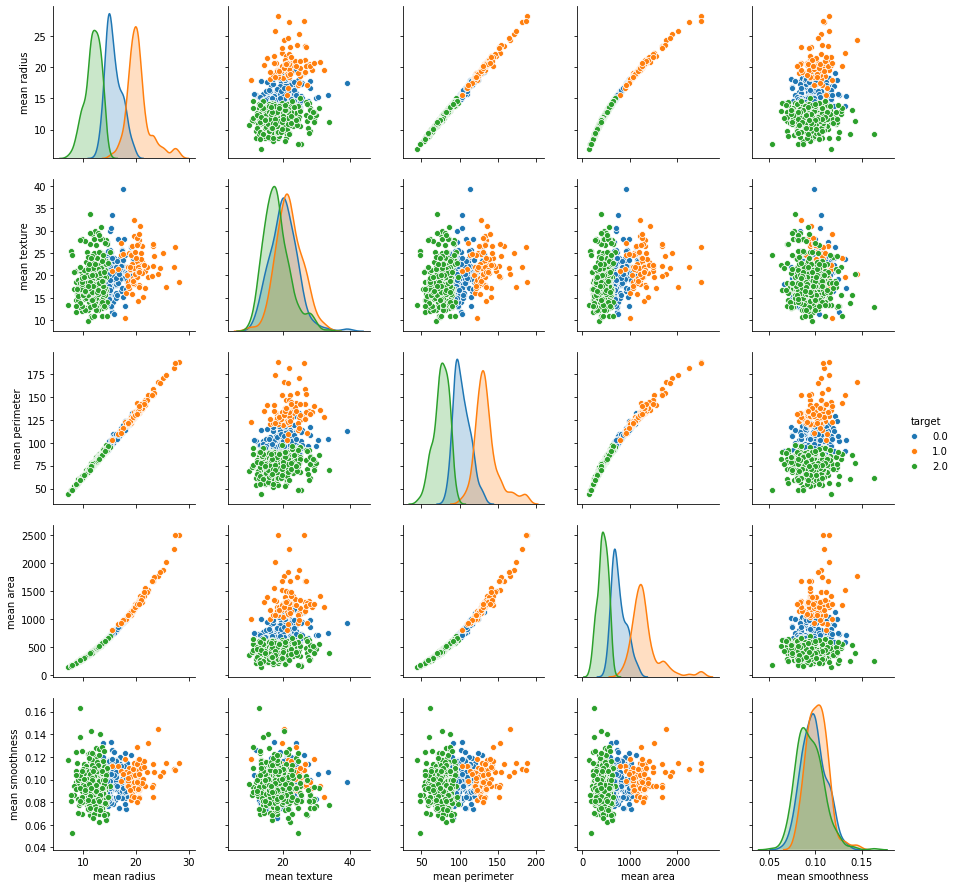

In [70]:
rak = datasets.load_breast_cancer()

names = rak.feature_names[:5].copy()
czas = time.time()
centers, target = kMeans(rak.data, 3)
print('czas: ', time.time() - czas)
names = np.append(names, 'target')
df = pd.DataFrame(data=np.c_[(rak.data.T[:5]).T, target], columns=names)

sns.pairplot(df, hue='target', vars=rak.feature_names[:5])